# 1.0. Tools

## 1.1. Importação das Bibliotecas

O primeiro passo para começar os tratamentos é instalar e importar as bibliotecas necessárias.



In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.cluster import KMeans
import math

import sys 
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

## 1.2. Importação dos dados

Importar os dados a partir da base de dados.



In [125]:
df = pd.read_csv('BaseDeDados.csv')

In [126]:
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [127]:
df.shape

(116581, 27)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

## 1.3. Funções Auxiliares

In [129]:
def plot_perc(st,dados):
    '''Plota o histograma da variavel st'''

    plt.figure(figsize=(20,8))

    g = sns.countplot(x= st,data=dados,orient='h')
    g.set_ylabel('Contagem',fontsize=17)

    sizes = []
    
    for p in g.patches:  
        height = p.get_height()  # altura de cada barra
        sizes.append(height)
        g.text(p.get_x() + p.get_width()/1.6,
              height+200,
              '{:1.2f}%'.format(height/116581*100),  # percentual acima da barra
              ha = 'center',va='bottom',fontsize=12)

    g.set_ylim(0,max(sizes)*1.1)
    
    
def numero_otimo_clusters(wcss):
    x1, y1 = 2,wcss[0]
    x2, y2 = 20,wcss[len(wcss)-1]

    distancia = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2 - y1)*x0 - (x2 - x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancia.append(numerador/denominador)
    return distancia.index(max(distancia)) + 2


def calcular_wcss(data):
  ''' testando qual o  numero de cluster ideial, de  1 a 10 clusters  '''
  wcss = []
  for k in range(1,10):
      kmeans = KMeans(n_clusters = k)
      kmeans.fit(X=data)
      data['Clusters']=kmeans.labels_   # coloca qual cluster o dado pertence
      wcss.append(kmeans.inertia_)      # coloca o valor da inercia do dado
  return wcss

def ordenador_cluster(cluster_nome,target_nome,df, ordem):
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome,ascending=ordem).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df,agrupado_por_cluster_ordenado[[cluster_nome,'index']],on=cluster_nome)
    removendo_dandos = juntando_cluster.drop([cluster_nome],axis=1)
    df_final = removendo_dandos.rename(columns={'index':cluster_nome})
    return df_final

# 2.0. Análise Exploratória dos Dados


Aqui vamos fazer algumas analises preliminares para saber como nossos clientes se comportam e assim levantar hipoteses.

### Clientes por Estado

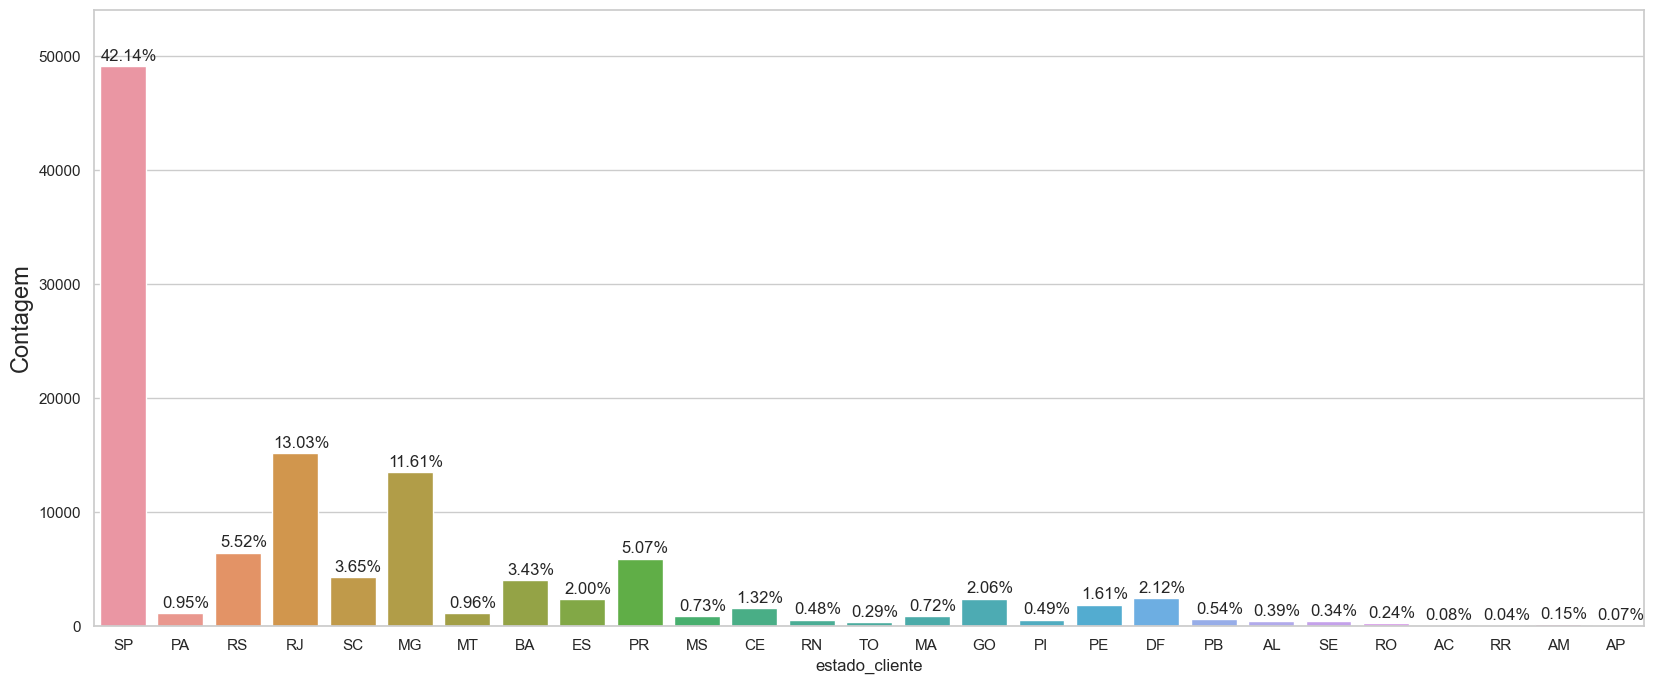

In [130]:
plot_perc('estado_cliente',df)

Vemos que São Paulo é o estado com mais compradores.

### Vendedores por Estado

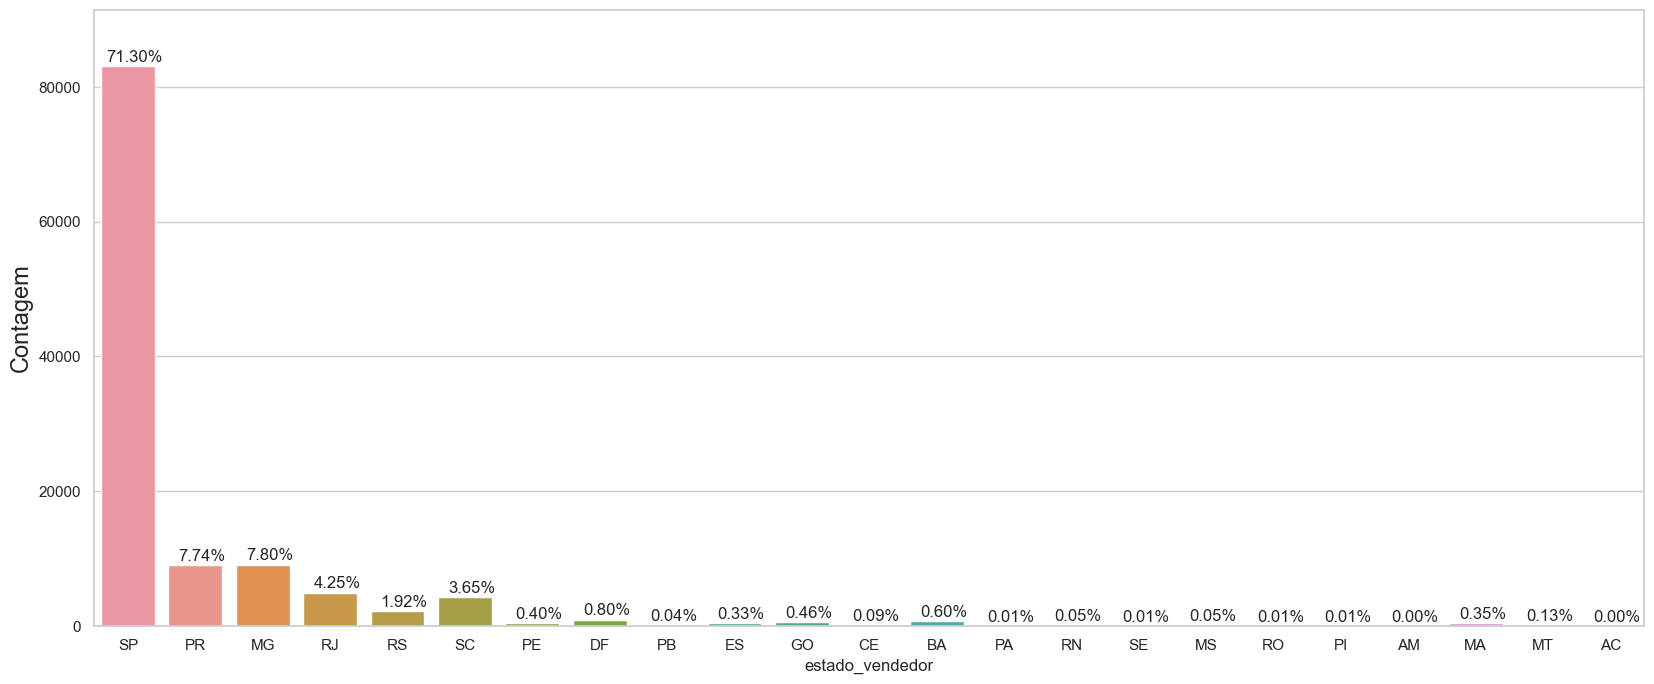

In [131]:
plot_perc('estado_vendedor',df)

Vemos que São Paulo é o estado com mais vendedores. Porém comparando com o numero de compradores (grafico acima) vemos que alguns estados deveriam ter mais vendedores.

### Formas de Pagamento

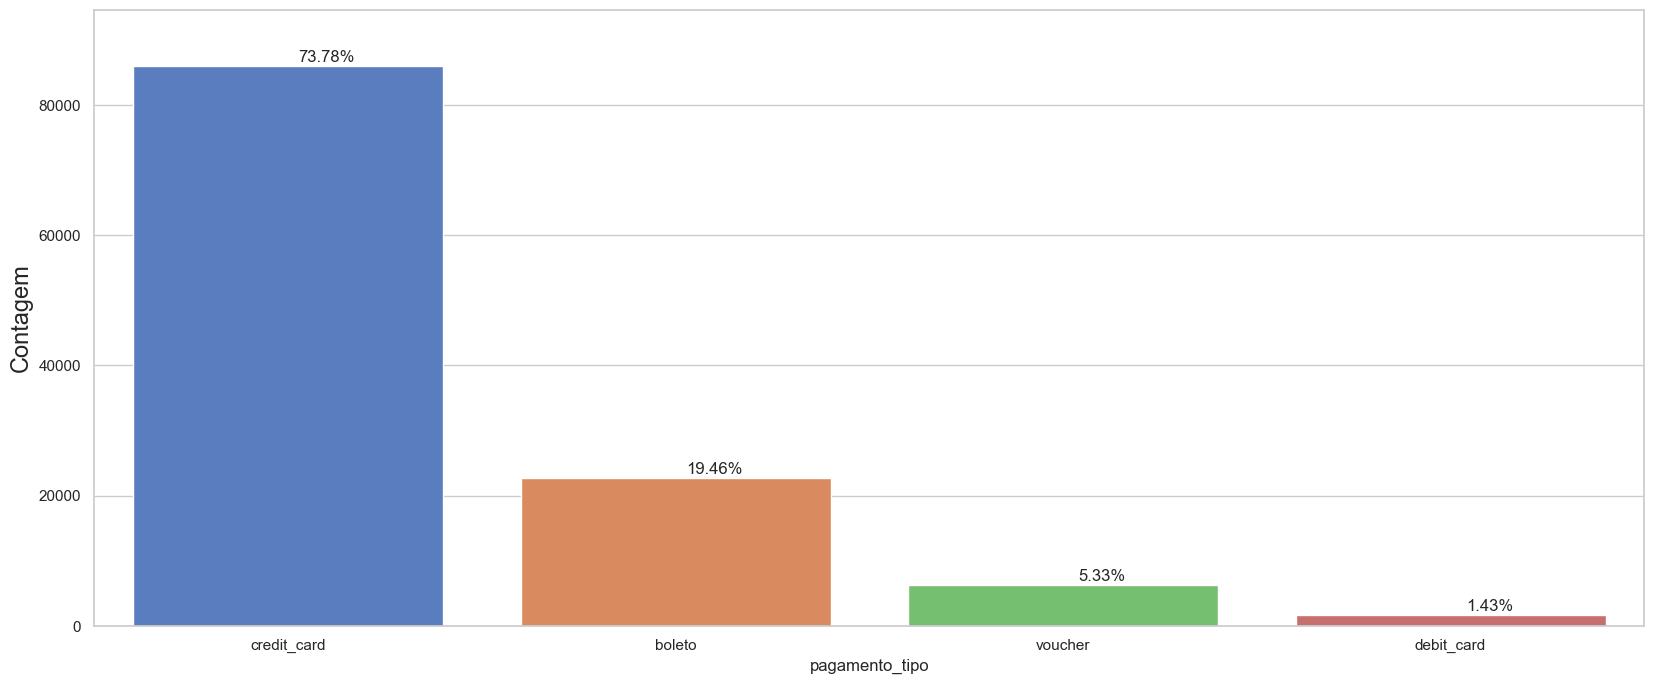

In [132]:
plot_perc('pagamento_tipo',df)

Cartão de credito é a forma mais usada.

In [133]:
df[['preco', 'frete']]

,preco,frete
0,124.99,21.88
1,112.99,24.90
2,112.99,24.90
3,124.99,15.62
4,106.99,30.59
...,...,...
116576,289.49,24.83
116577,19.00,12.86
116578,39.90,12.87
116579,57.90,19.60


### Frete - Mapa de Calor

Vamos analisar como ocorre a distribuição de valores em função da localização de cliente e vendedor.

In [134]:
# divisão dos estados
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

# nova variável chamada Região (baseado no estado_cliente)
df.loc[df['estado_cliente'].isin(sudeste), 'Regiao'] = 'Southeast'
df.loc[df['estado_cliente'].isin(nordeste), 'Regiao'] = 'Northeast'
df.loc[df['estado_cliente'].isin(norte), 'Regiao'] = 'North'
df.loc[df['estado_cliente'].isin(centro_oeste), 'Regiao'] = 'Midwest'
df.loc[df['estado_cliente'].isin(sul), 'Regiao'] = 'South'

def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

cross_heatmap(df[df['preco'] != -1], ['estado_vendedor', 'Regiao'], 
              values=df[df['preco'] != -1]['frete'], aggfunc='mean')

Regiao,Midwest,North,Northeast,South,Southeast
estado_vendedor,,,,,
AC,nan,nan,nan,nan,32.840000
AM,nan,nan,28.255000,nan,25.290000
BA,29.977381,46.290476,22.736355,39.643671,33.618110
CE,65.456667,85.614000,29.744054,51.445556,47.044130
DF,13.022231,58.371935,27.532778,27.076867,19.654101
ES,36.895833,60.022857,38.183269,39.894510,28.753852
GO,14.573721,26.595909,33.369841,30.426667,23.764630
MA,27.150192,28.859000,19.453333,42.660652,31.880362
MG,26.980406,41.923133,34.144730,28.976495,21.278114


# 3.0. Análise RFM

## 3.1. Recência

Recência é a última interação do cliente, ou seja, o tempo que faz que ele não compra.


### Construindo a varivel Recência

In [135]:
# banco de dados com algumas colunas de df
df_olist = df[['id_unico_cliente','id_cliente','horario_pedido','item_id','preco']]
df_olist.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99


In [99]:
# Agrupando os clientes pela data "horario_pedido", para saber quando foi a ultima compra de cada cliente
# Com isso   df_compra['Recencia']  vai ser a data maxima (ultima compra) menos a data da ultima compra de cada cliente 

df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente','DataMaxCompra']
df_compra['DataMaxCompra'] = pd.to_datetime(df_compra['DataMaxCompra'])
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

df_compra.head()

,id_unico_cliente,DataMaxCompra,Recencia
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


In [100]:
# Agora juntando os dois bancos de dados

df_usuario = pd.merge(df_olist,df_compra[['id_unico_cliente', 'Recencia']],on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


### Regra do Cotovelo
Utilizando a recencia para definir o numero de clusters

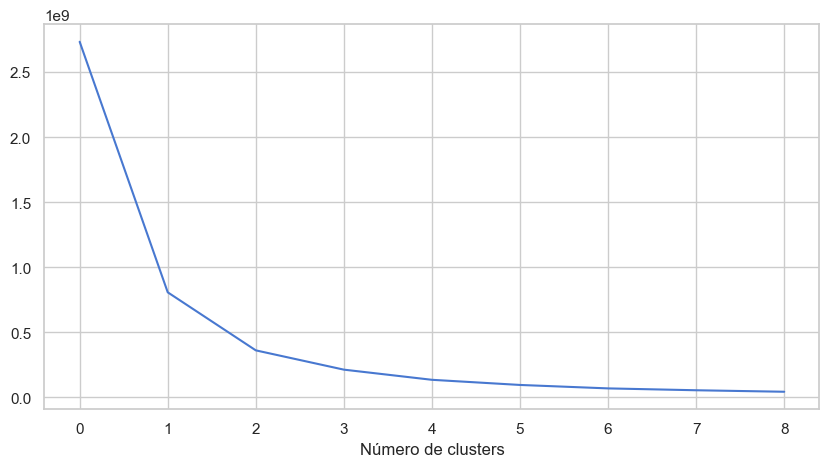

In [101]:
df_recencia = df_usuario[['Recencia']]
soma_quadrados = calcular_wcss(df_recencia)

plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('Número de clusters')
plt.show()

In [102]:
n = numero_otimo_clusters(soma_quadrados)
n

4

###  Método da Silhueta

Essa é uma métrica de avaliação de clusterização que quantifica a qualidade de um agrupamento de dados. 

Ele fornece uma medida de quão bem separados estão os clusters.

In [ ]:
# from sklearn.metrics import silhouette_samples, silhouette_score

# for i in range(2, 6):
#     clusterer = KMeans(n_clusters=i)
#     preds = clusterer.fit_predict(df_recencia)
#     score = silhouette_score(df_recencia, preds)
#     print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

De acordo com o Método da Silhueta 4 clusters é o melhor valor. Pois nesse caso o coeficiente de silhueta é o que mais se aproxima de 1. 

### Clusterizando a Recência

In [103]:
kmeans = KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)  # onde df_recencia = df_usuario[['Recencia']]
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,2
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,1
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,1
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,2
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,3


Media de cada cluster

Quero dar uma pontuação maior para aqueles clientes que tem pouco tempo que não compram (recencia menor)

In [104]:
df_usuario = ordenador_cluster('RecenciaCluster','Recencia',df_usuario, False)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [105]:
# media organizada de forma decrescente, ou seja, o cliente que tem pouco tempo que não compra tem uma pontuação maior
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
RecenciaCluster,,,,,,,,
0,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0
1,30957.0,319.957296,44.086874,254.0,281.0,313.0,357.0,405.0
2,33510.0,187.656789,34.961732,128.0,158.0,187.0,218.0,253.0
3,31790.0,66.790878,36.009443,0.0,33.0,67.0,100.0,127.0


## 3.2. Frequência

Frequência é a frequência de compras, ou seja, quantas compras esse cliente já fez na sua empresa, desde que se cadastrou?


In [106]:
# Agrupoando o cliente pela quantidade de pedidos dele
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente','Frequencia']
df_frequencia.head()

,id_unico_cliente,Frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [107]:
df_usuario = pd.merge(df_usuario,df_frequencia,on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [108]:
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [109]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
2,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0
3,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0


In [110]:
# O cliente que comprou mais vezez (tem a maior frequencia), tem uma pontuação maior

df_usuario = ordenador_cluster('FrequenciaCluster','Frequencia',df_usuario, True) #LEMBRE DE MUDAR O FALSE PARA TRUE NA FUNÇÃO
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9205.0,5.644432,2.138491,4.0,4.0,5.0,6.0,13.0
2,731.0,21.489740,6.588977,14.0,15.0,21.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


## 3.3. Receita

Monetaridade é o valor total gasto, ou seja, quanto esse cliente já gastou em dinheiro na sua empresa?

In [111]:
# Calculando e adicionando a receita a tabela df_usuario
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
df_receita.columns = ['id_unico_cliente','Receita']

df_usuario = pd.merge(df_usuario,df_receita,on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


In [112]:
df_receita = df_usuario[['Receita']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_receita)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [113]:
# as pessoas que gastaram menos vão receber uma nota menor
df_usuario = ordenador_cluster('ReceitaCluster','Receita',df_usuario, True)
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [114]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


 # 4.0. Criando uma pontuação

In [115]:
# criando novo banco de dados so com as informações que vamos precisar
df_final = df_usuario[['id_unico_cliente','Recencia','RecenciaCluster','Frequencia','FrequenciaCluster','Receita','ReceitaCluster']]
df_final.tail()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
116576,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116577,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116578,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116579,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3
116580,0a0a92112bd4c708ca5fde585afaa872,338,1,8,1,109312.64,3


In [116]:
# Calcularemos a pontuação geral do cliente baseado nesses clusters e também definimos 4 opções: 
# inativo, business, master e premium.

df_final['Pontuacao'] = df_usuario['RecenciaCluster'] + df_usuario['FrequenciaCluster']+df_usuario['ReceitaCluster']

df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao']>=1,'Segmento'] = 'Business'
df_final.loc[df_final['Pontuacao']>=3,'Segmento'] = 'Master'
df_final.loc[df_final['Pontuacao']>=5,'Segmento'] = 'Premium'

df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0,0,Inativo
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0,0,Inativo
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0,0,Inativo
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0,0,Inativo
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0,0,Inativo


In [117]:
# df_final.to_csv('RFM.csv')

## Analisando as Features

In [118]:
def plot_segmento(x,y,data):
    sns.set(palette='muted',color_codes=True,style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y,hue='Segmento',data=data,size='Segmento',sizes=(50,150),size_order=['Premium','Master','Business','Inativo'])
    plt.show()


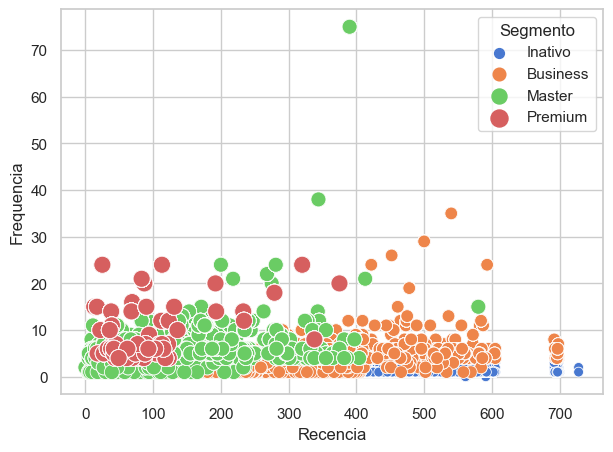

In [119]:
plot_segmento('Recencia','Frequencia',df_final)

Aqueles que que compraram mais (frequencia maior) e a ultima vez que compraram faz pouco tempo (baixa recencia) estão no Premiun
Enquanto que aqueles que compraram menos e tem mais tempo que não compram são considerados inativos.

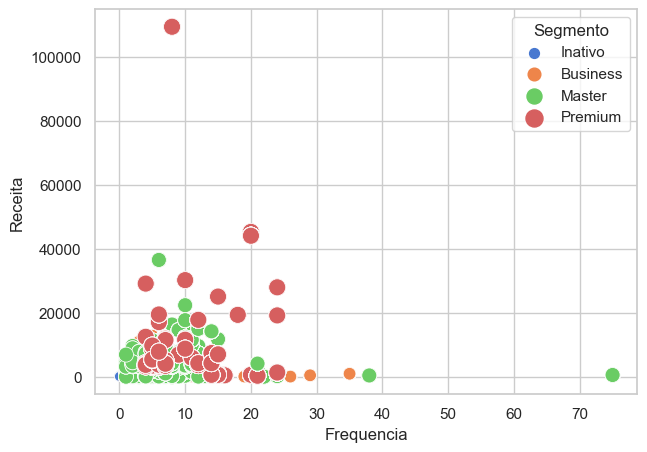

In [120]:
plot_segmento('Frequencia','Receita',df_final)

Clientes que compram com muita frequencia, mas valores pequenos estão no Master. E aqueles que gastam bastante mas com pouco frequencia estão no Premium.

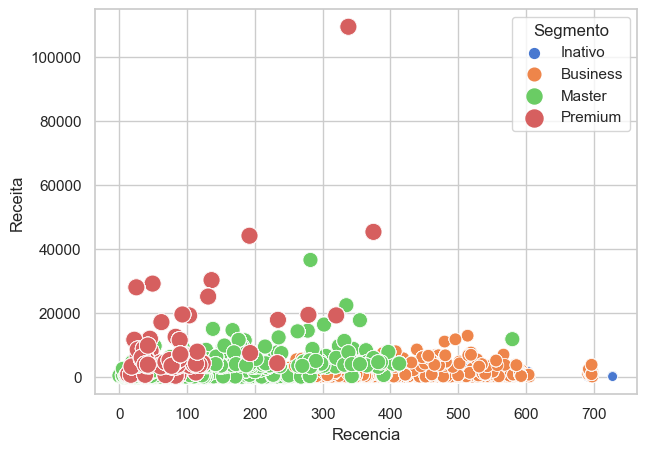

In [121]:
plot_segmento('Recencia','Receita',df_final)

Cliente que faz muito tempo que nao compra e não compra muito esta no Business, a medida que vai melhorando a questao de recencia ele vai subindo de nivel ate chegar no Premium

In [122]:
df_final['Segmento'] 

0         Inativo
1         Inativo
2         Inativo
3         Inativo
4         Inativo
           ...   
116576    Premium
116577    Premium
116578    Premium
116579    Premium
116580    Premium
Name: Segmento, Length: 116581, dtype: object

<Axes: xlabel='Segmento', ylabel='count'>

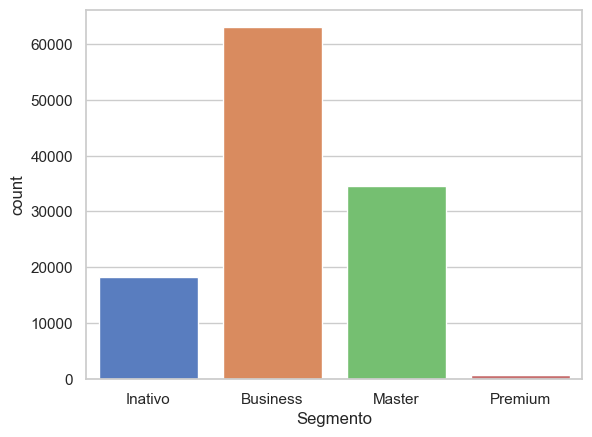

In [123]:
sns.countplot(data=df_final, x='Segmento')

A maioria dos clientes estão no Business. Uma boa quantidade em Master e Inativo. E pouquisimos Premium.

## Proximos Passos

Como proximo passo poderiamos fazer uma análise mais completa, nos basearmos em uma pontuação de 1 a 5 como o exemplo abaixo:


| **Segmentos**        | **Descrição**                                                      | **Recência** | **Frequência** | **Receita** |
|----------------------|--------------------------------------------------------------------|--------------|----------------|-------------|
| Campeões             | Compraram recentemente, compram com frequência e gastam muito      | 4-5          | 4-5            | 4-5         |
| Clientes fiéis       | Gastam muito e respondem a promoções                               | 2-5          | 3-5            | 3-5         |
| Potencialmente fiéis | Compraram recentemente, mais de uma vez e gastaram uma boa quantia | 3-5          | 1-3            | 1-3         |
| Novos clientes       | Compraram recentemente, mas não compram com frequência             | 4-5          | <=1            | <=1         |
| Promissores          | Compraram recentemente, mas não gastaram muito                     | 3-4          | <=1            | <=1         |
| Precisam de atenção  | Recência, frequência e valor monetário acima da média              | 2-3          | 2-3            | 2-3         |
| Quase em risco       | Recência, frequência e valor monetário abaixo da média             | 2-3          | <=2            | <=2         |
| De risco             | Gastaram muito, compraram muitas vezes, mas há muito tempo         | <=2          | 2-5            | 2-5         |
| Não pode perdê-los   | Compraram muito e com frequência, mas há muito tempo               | <=1          | 4-5            | 4-5         |
| Hibernando           | Compraram pouco, com baixa frequência e há muito tempo             | 1-2          | 1-2            | 1-2         |
| Perdidos             | Recência, frequência e valores monetários baixos                   | <=2          | <=2            | <=2         |

